In [2]:
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 20.8 MB/s eta 0:00:00


In [3]:
#headers
import numpy as np
from numpy import kron
from scipy.linalg import eigvalsh
from math import log2
from qutip import *

def matrizDensidad(estado):
  #hace la multiplicación del ket con el bra para obtener la matriz densidad
  return np.outer(estado, estado.conj())



In [4]:
def schmidt(estado):
    """Devuelve coeficientes y bases ortonormales de la descomposición de Schmidt para un estado (bipartito) definido con qutip."""
    # Qutip no tiene una funcion especifica así que hay que hacerlo con numpy
    vec = estado.full().flatten()
    vec = vec.reshape(2, 2)
    U, D, V = np.linalg.svd(vec)
    # D contiene los coeficientes de Schmidt (valores singulares)
    lambdas = D
    # Las columnas de U y V.T son las bases ortonormales
    bases_A = U
    bases_B = V.conj().T

    return lambdas, bases_A, bases_B

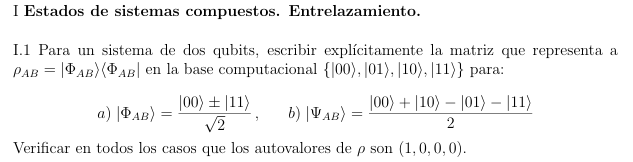

In [5]:
def chequearEstado(estado):
  rho = matrizDensidad(estado)
  print("Matriz densidad ρ:")
  print(np.round(rho, 2))

  autovalores = np.linalg.eigvals(rho) #calculo autovalores
  print("Autovalores de ρ:")
  print(np.round(autovalores, 2))


# a)
phi_p = (np.array([1, 0, 0, 1]) / np.sqrt(2))  # (|00> + |11>)/sqrt(2)
phi_n = (np.array([1, 0, 0, -1]) / np.sqrt(2))  # (|00> - |11>)/sqrt(2)

# b)
psi = (np.array([1, -1, 1, -1]) / 2)  # (|00⟩ + |10⟩ − |01⟩ − |11⟩) / 2

estados = {
  "|Φ+⟩": phi_p,
  "|Φ−⟩": phi_n,
  "|Ψ⟩": psi
}

for nom, est in estados.items():
    print("Estado: ",nom, "=", np.round(est,2))
    print()
    chequearEstado(est)
    print()
    print()

Estado:  |Φ+⟩ = [0.71 0.   0.   0.71]

Matriz densidad ρ:
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
Autovalores de ρ:
[1. 0. 0. 0.]


Estado:  |Φ−⟩ = [ 0.71  0.    0.   -0.71]

Matriz densidad ρ:
[[ 0.5  0.   0.  -0.5]
 [ 0.   0.   0.  -0. ]
 [ 0.   0.   0.  -0. ]
 [-0.5 -0.  -0.   0.5]]
Autovalores de ρ:
[1. 0. 0. 0.]


Estado:  |Ψ⟩ = [ 0.5 -0.5  0.5 -0.5]

Matriz densidad ρ:
[[ 0.25 -0.25  0.25 -0.25]
 [-0.25  0.25 -0.25  0.25]
 [ 0.25 -0.25  0.25 -0.25]
 [-0.25  0.25 -0.25  0.25]]
Autovalores de ρ:
[0. 1. 0. 0.]




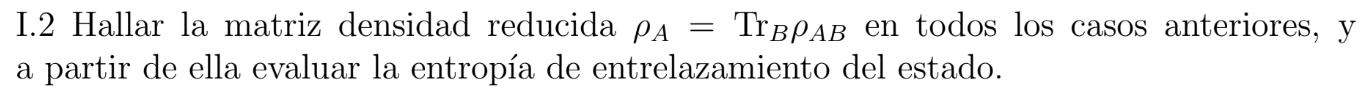

In [6]:
# Estados base
st0 = basis(2, 0)
st1 = basis(2, 1)

# Diccionario de estados
estados2 = {
    'phi_p': ((tensor(st0, st0) + tensor(st1, st1)).unit()),
    'phi_m': ((tensor(st0, st0) - tensor(st1, st1)).unit()),
    'psi': ((tensor(st0, st0) + tensor(st1, st0) - tensor(st0, st1) - tensor(st1, st1)).unit())
}

for nom, estado in estados2.items():
    rho_AB = ket2dm(estado)  # matriz densidad total
    rho_A = ptrace(rho_AB, 0)  # traza parcial sobre el segundo qubit

    # Calcular entropía de von Neumann
    eigenvals = rho_A.eigenenergies()
    entropy = -sum(l * np.log2(l) for l in eigenvals if l > 0)

    # Mostrar resultados
    print(f"{nom}:")
    print("ρ_A =")
    print(np.array_str(rho_A.full(), precision=3, suppress_small=True))
    print(f"Entropía de entrelazamiento: {entropy:.4f}\n")

phi_p:
ρ_A =
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
Entropía de entrelazamiento: 1.0000

phi_m:
ρ_A =
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
Entropía de entrelazamiento: 1.0000

psi:
ρ_A =
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]
Entropía de entrelazamiento: -0.0000



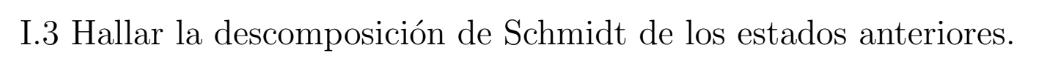

phi ya está en su descomposición de schmidt, y si se opera con psi se puede llegar a una expresión en la base de |+> |->

In [7]:
for nom, estado in estados2.items():
    lambdas, base_A, base_B = schmidt(estado)

    print(f"{nom}:")
    print("Coef de Schmidt:", np.round(lambdas, 3))
    print("Base ortonormal en A:\n", np.round(base_A, 4))
    print("Base ortonormal en B:\n", np.round(base_B, 4))
    print()

phi_p:
Coef de Schmidt: [0.707 0.707]
Base ortonormal en A:
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Base ortonormal en B:
 [[1.-0.j 0.-0.j]
 [0.-0.j 1.-0.j]]

phi_m:
Coef de Schmidt: [0.707 0.707]
Base ortonormal en A:
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Base ortonormal en B:
 [[ 1.-0.j -0.-0.j]
 [ 0.-0.j -1.-0.j]]

psi:
Coef de Schmidt: [1. 0.]
Base ortonormal en A:
 [[-0.7071+0.j -0.7071+0.j]
 [-0.7071+0.j  0.7071+0.j]]
Base ortonormal en B:
 [[-0.7071-0.j  0.7071-0.j]
 [ 0.7071-0.j  0.7071-0.j]]

